In [1]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
from scipy import stats
import plot as pltfn
from kuramoto1 import Kuramoto
import admin_functions as adfn
from sklearn import decomposition
sns.reset_orig()
#plt.style.use('dark_background')
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload


# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [2]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnraw, p20raw

NameError: name 'os' is not defined

# Baseline vs Pre-seizure vs Seizure 
* we want traces that show clear separation of brain states (pre-ictal, ictal, post-ictal)
* if maximum of mean trace is >4x minimum of mean trace - then generalised events occur, pre and post-ictal periods


In [4]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnbin = sorted(glob.glob('*BLN*0binarised.npy'))
p20bin = sorted(glob.glob('*PTZ20*0binarised.npy'))
blnnnb = sorted(glob.glob('*BLN*nnb*'))
p20nnb = sorted(glob.glob('*PTZ20*nnb*'))
#blnraw, p20raw
blnbin, p20bin

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_0.590binarised.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.590b

In [ ]:
i = 8
data = np.load(p20raw[i])
fig, ax = plt.subplots(figsize= (20,2))
mean = np.apply_along_axis(np.mean, 0, data)
plt.plot(mean, linewidth = 2, c = 'firebrick')
plt.savefig(Ffig + 'p20_mean.svg', transparent = True)
plt.show()

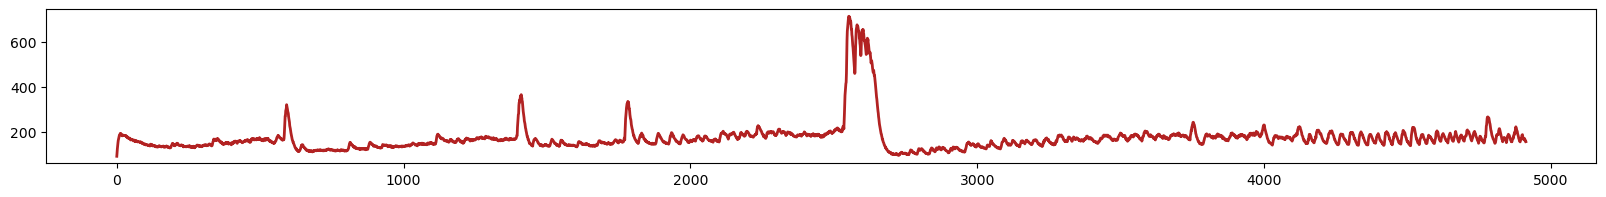

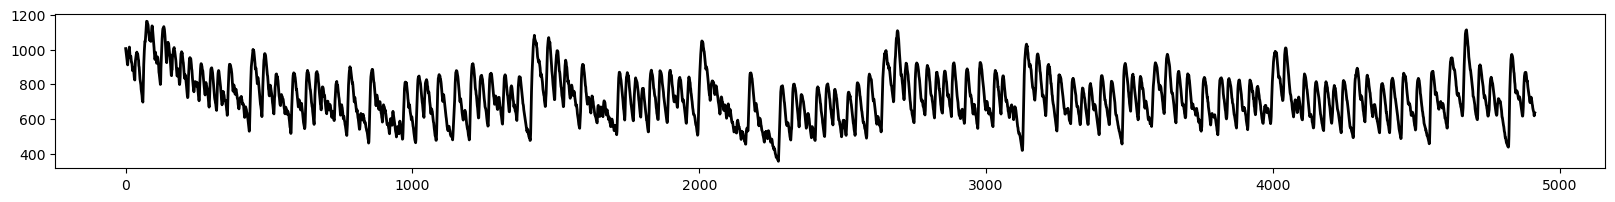

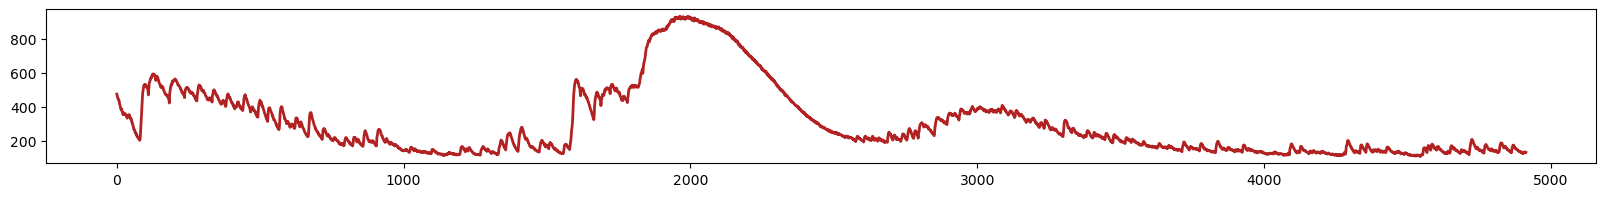

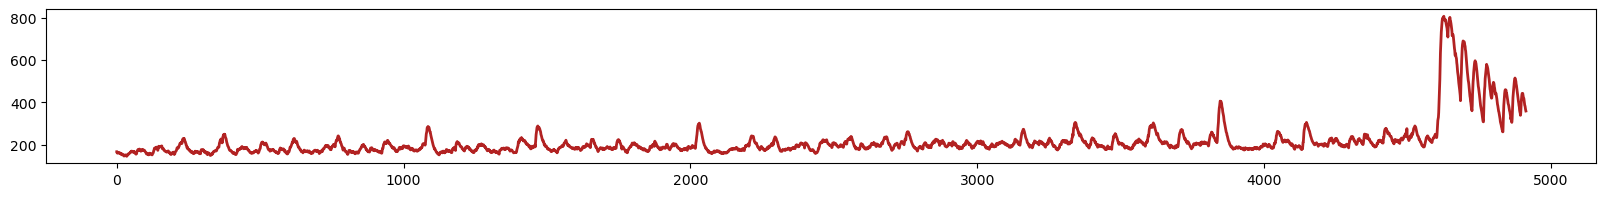

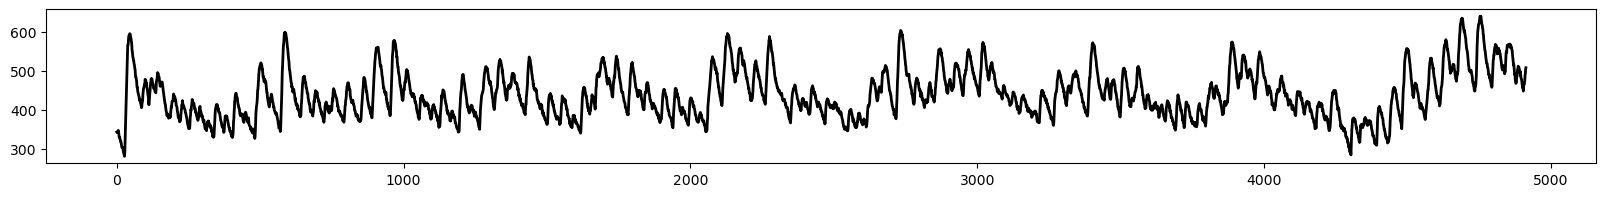

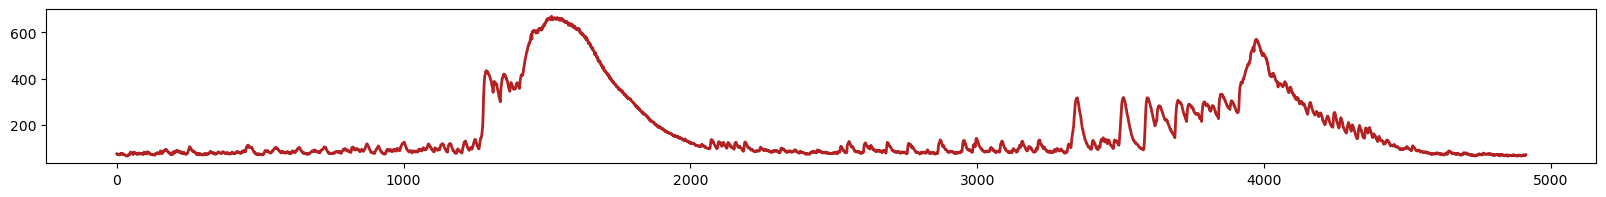

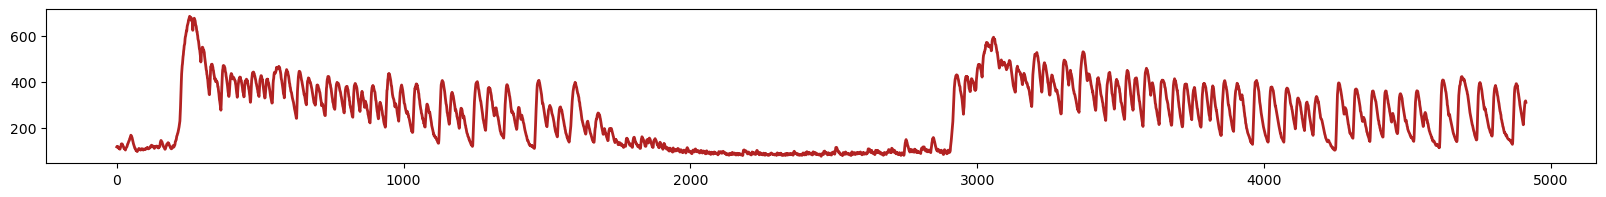

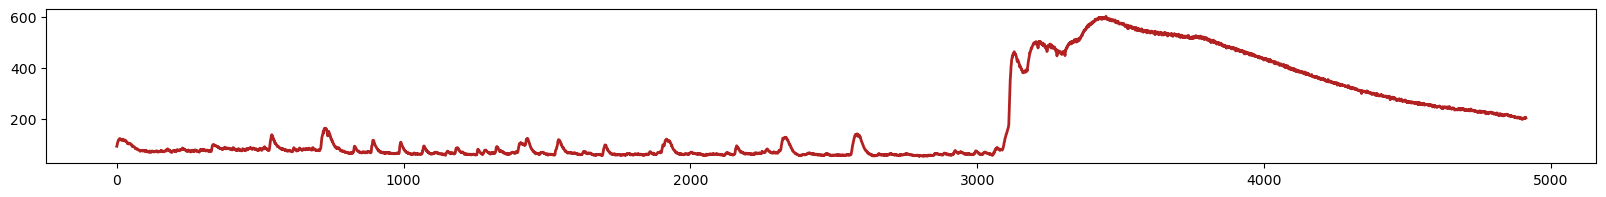

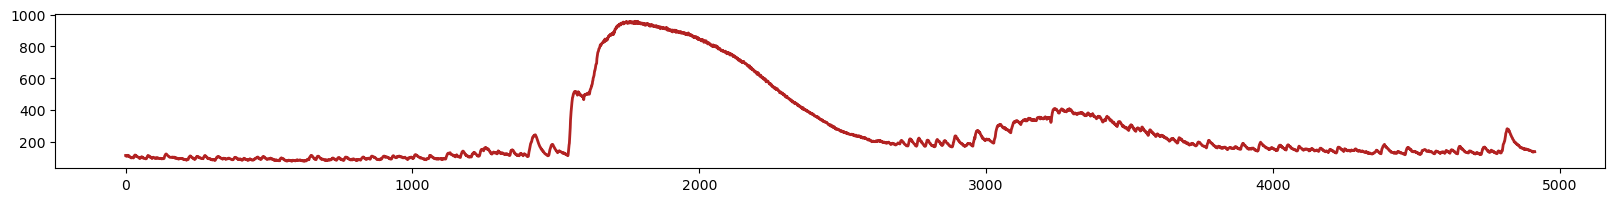

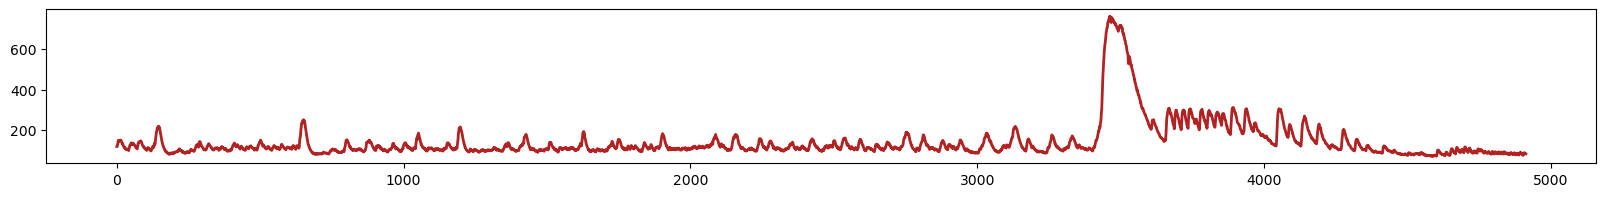

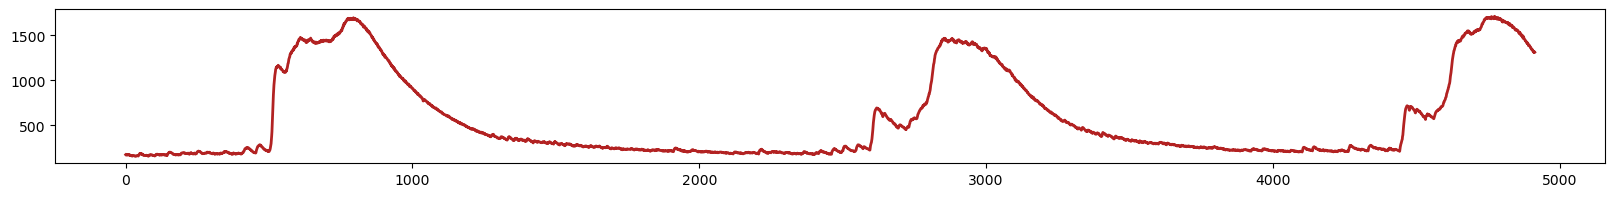

In [17]:
#which traces have clear pre-ictal and generalised periods
gen_list, sub_bln_list , gen_blist, sub_bln_blist, gen_nnblist, sub_bln_nnblist, sub_p5_list = [],[],[],[],[],[],[]
for o in range(len(p20raw)):
    p20 = np.load(p20raw[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    mini, maxi = np.min(mean), np.max(mean)
    fig, ax = plt.subplots(figsize= (20,2))  
    if o == 1 or o == 4:
        col = 'black'
    else:
        col = 'firebrick'
    plt.plot(mean, linewidth = 2, c= col)
    plt.savefig(Ffig + 'p20_mean-' + str(o) + '.svg', transparent = True)
    #plt.ylim(top = 1600)
    plt.show()


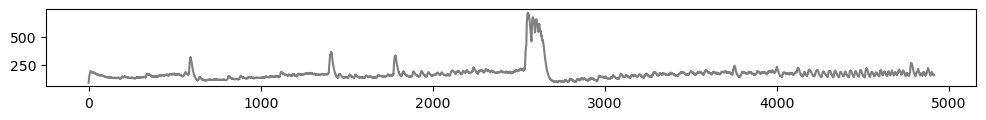

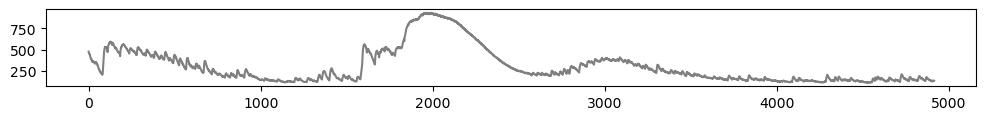

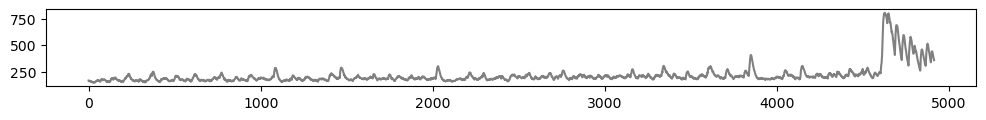

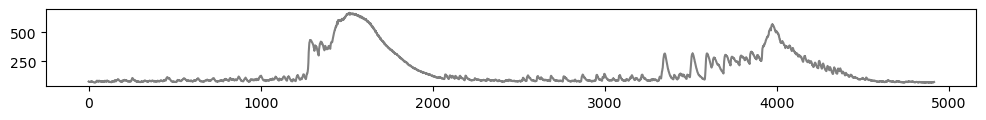

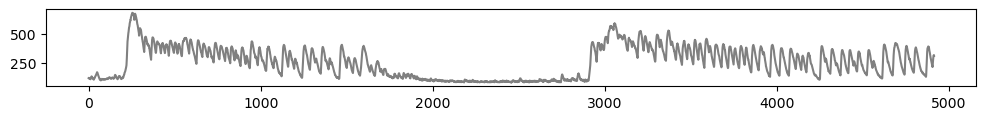

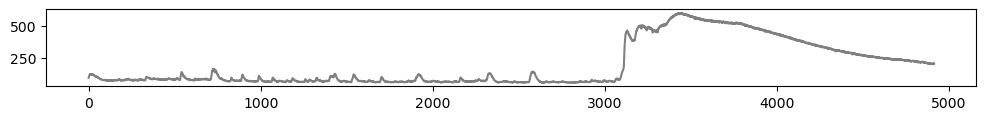

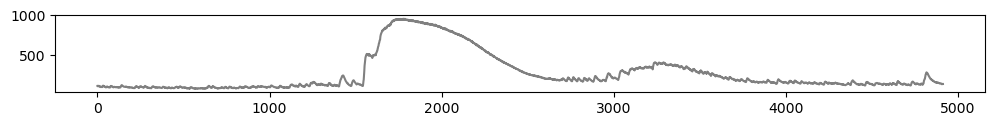

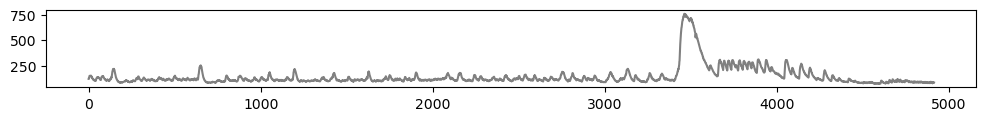

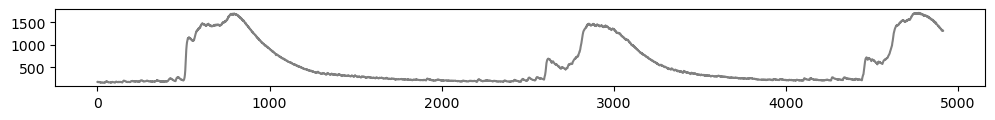

(array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
        'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy'],
       dtype='<U66'),
 array(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
        'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
        'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_0.590binarised.npy',
        'PTZ-WILDTYPE-07_2photon_se

In [20]:
#which traces have clear pre-ictal and generalised periods
gen_list, sub_bln_list , gen_blist, sub_bln_blist, gen_nnblist, sub_bln_nnblist, sub_p5_list = [],[],[],[],[],[],[]
for o in range(len(p20raw)):
    p20 = np.load(p20raw[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    mini, maxi = np.min(mean), np.max(mean)
    if 4*mini < maxi:
        fig, ax = plt.subplots(figsize= (12,1))  
        plt.plot(mean, c='grey')
        gen_list = np.append(gen_list, p20raw[o])
        gen_blist = np.append(gen_blist, p20bin[o])
        gen_nnblist = np.append(gen_nnblist, p20nnb[o])
        sub_bln_list = np.append(sub_bln_list, blnraw[o])
        sub_bln_blist = np.append(sub_bln_blist, blnbin[o])
        sub_bln_nnblist = np.append(sub_bln_nnblist, blnnnb[o])
        sub_p5_list = np.append(sub_p5_list, p5raw[o])
        plt.show()
gen_list, gen_blist, gen_nnblist

* define generalised events - max amplitude increase in sliding window

In [23]:
np.arange(when, when+400)

array([500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512,
       513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525,
       526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538,
       539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551,
       552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564,
       565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577,
       578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590,
       591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603,
       604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616,
       617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629,
       630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642,
       643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655,
       656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668,
       669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 68

In [ ]:
#which traces have clear pre-ictal and generalised periods
gen_list, sub_bln_list , gen_blist, sub_bln_blist, gen_nnblist, sub_bln_nnblist, sub_p5_list = [],[],[],[],[],[],[]
for o in range(len(p20raw)):
    p20 = np.load(p20raw[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    mini, maxi = np.min(mean), np.max(mean)
    fig, ax = plt.subplots(figsize= (20,2))  
    plt.plot(mean, linewidth = 2, c= col)
    plt.savefig(Ffig + 'p20_mean-' + str(o) + '.svg', transparent = True)
    #plt.ylim(top = 1600)
    plt.show()


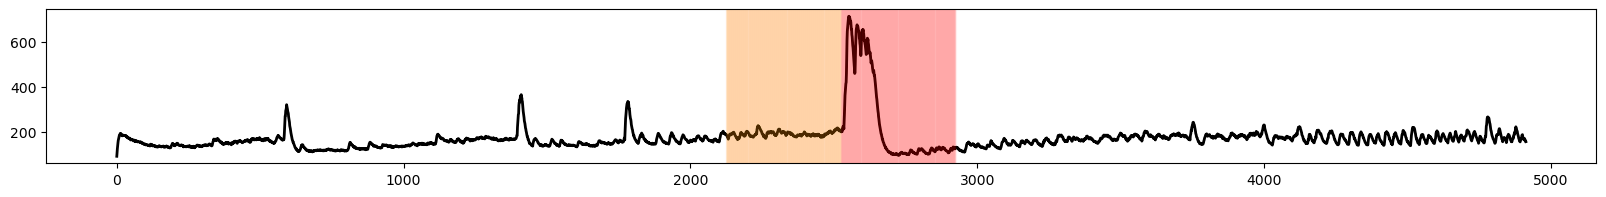

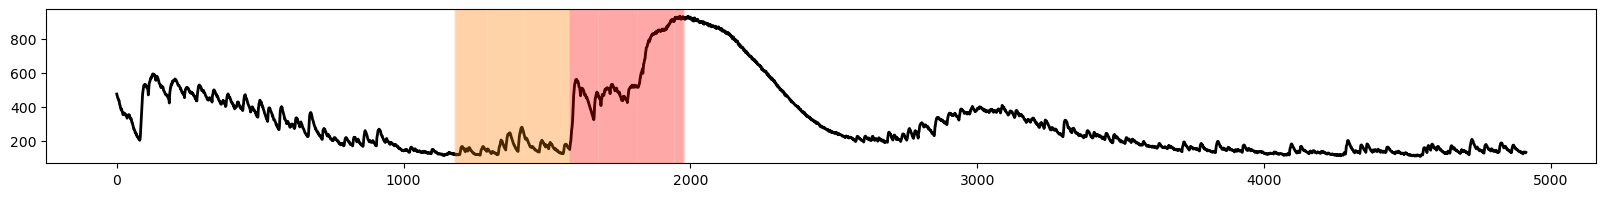

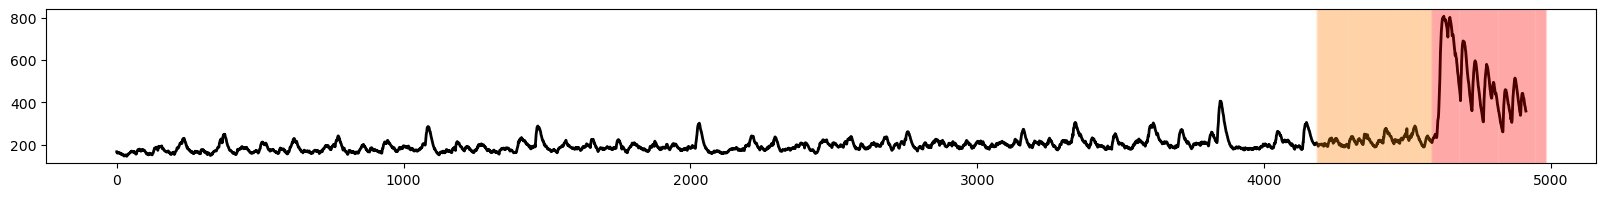

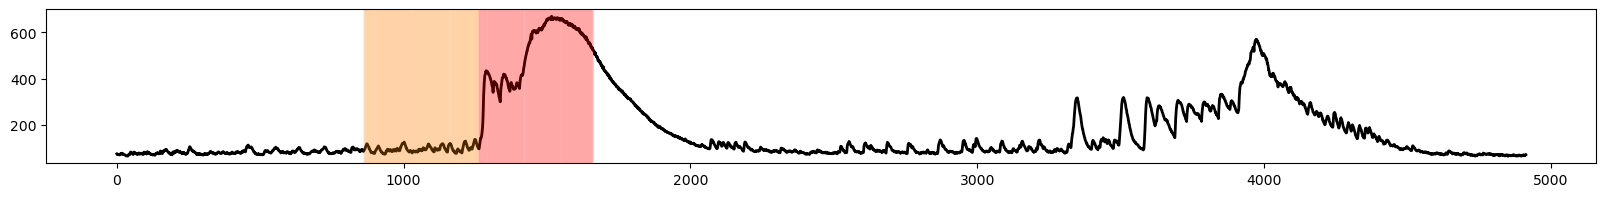

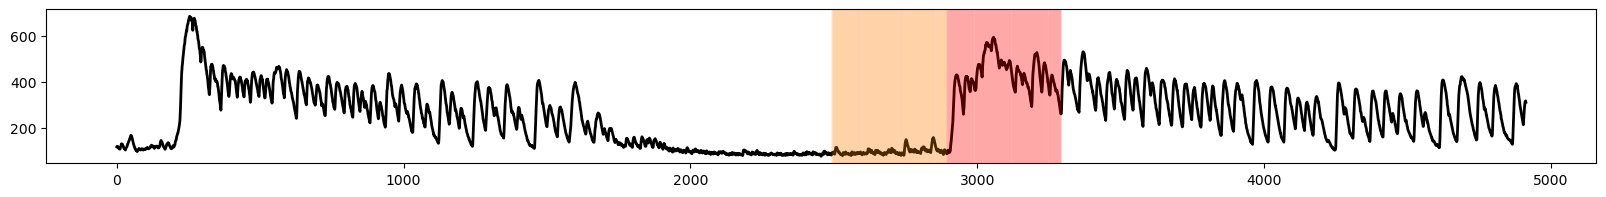

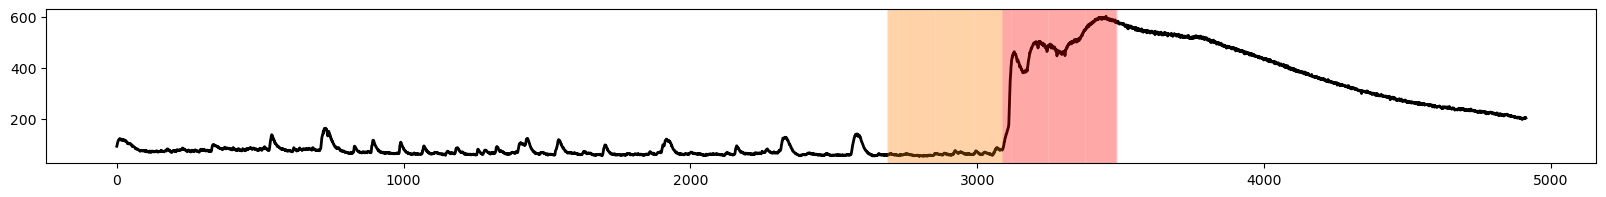

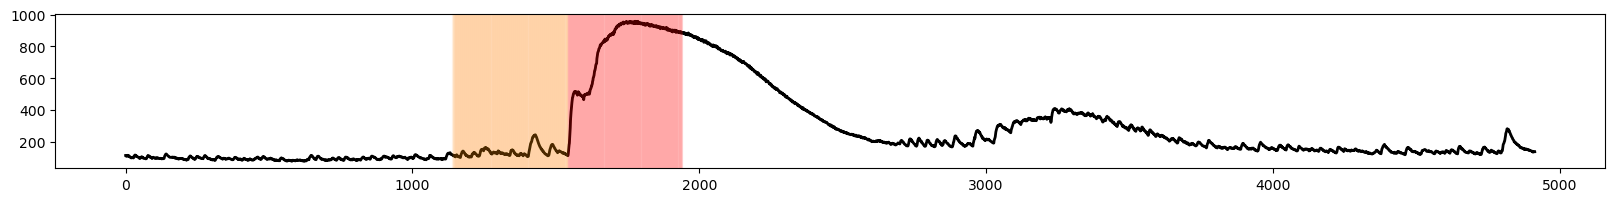

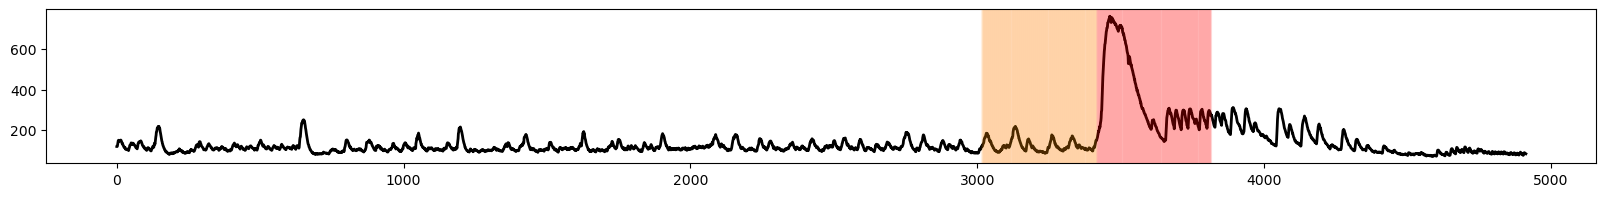

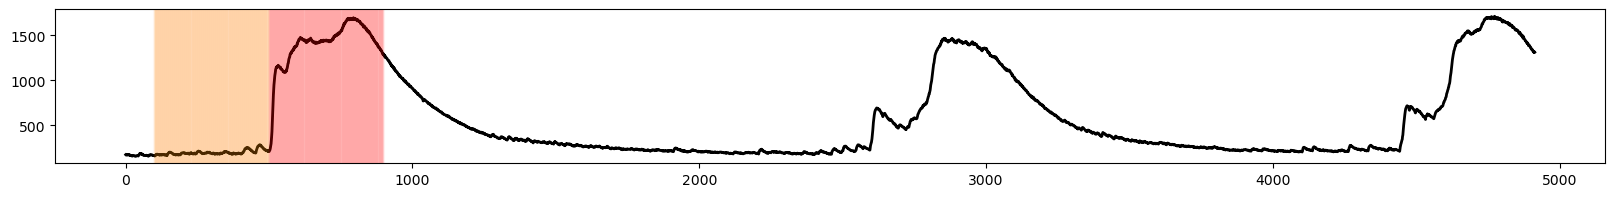

In [39]:
#IDENTIFY GENERALISED EVENT
max_list = list(range(len(gen_list)))
for o in range(len(gen_list)):
    p20 = np.load(gen_list[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    #if o == 4:
    #    mean = mean[np.int(mean.shape[0]/2):]
    window = adfn.window(30, mean.shape[0])[0]
    diffs = list(range(mean.shape[0] - window))
    for t in range(mean.shape[0]):
        if t == mean.shape[0] - window:
            break
        diff_vec = np.zeros(window)
        for e in range(window):
            diff_vec[e] = mean[t+e] - mean[t] 
        diffs[t] = diff_vec
    
    sums, maxs = list(range(len(diffs))),list(range(len(diffs)))
    for i in range(len(diffs)):
        maxs[i] = np.max(diffs[i])

    fig, ax = plt.subplots(figsize= (20,2))  
    if o == 4:
        when = (mean.shape[0]/2) + 437
    else:
        when = np.where(maxs ==  np.max(maxs))[0]
    plt.plot(mean, linewidth = 2, c= 'k')
    for x in np.arange(when, when+400): plt.axvline(x=x, c='red',alpha = 0.05)
    for x in np.arange(when-400, when): plt.axvline(x=x, c='darkorange',alpha = 0.05)
    plt.savefig(Ffig + 'p20_mean_col-' + str(o) + '.svg', transparent = True)
    plt.show()

In [7]:
#Time series for baseline, preictal, ictal analysis
import random
window = 400
bln_list, bln_blist = list(range(len(gen_list))),list(range(len(gen_list)))
pre_list, pre_blist = list(range(len(gen_list))),list(range(len(gen_list)))
p20_list, p20_blist = list(range(len(gen_list))),list(range(len(gen_list)))

for e in range(len(gen_list)):
    bln_ran = random.randint(0,4914-window)
    bln_list[e] = np.load(sub_bln_list[e])[:,bln_ran:bln_ran+window]
    bln_blist[e] = np.load(sub_bln_blist[e])[:,bln_ran:bln_ran+window]
    if e == 4:
        pre_list[e] = np.load(gen_list[e])[:,np.int(4914/2)+max_list[e][0]-window:np.int(4914/2)+max_list[e][0]]
        pre_blist[e] = np.load(gen_blist[e])[:,np.int(4914/2)+max_list[e][0]-window:np.int(4914/2)+max_list[e][0]]
        p20_list[e] = np.load(gen_list[e])[:,np.int(4914/2)+max_list[e][0]:np.int(4914/2)+max_list[e][0]+window]
        p20_blist[e] = np.load(gen_blist[e])[:,np.int(4914/2)+max_list[e][0]:np.int(4914/2)+max_list[e][0]+window]
    else:
        pre_list[e] = np.load(gen_list[e])[:,max_list[e][0]-window:max_list[e][0]]
        pre_blist[e] = np.load(gen_blist[e])[:,max_list[e][0]-window:max_list[e][0]]
        p20_list[e] = np.load(gen_list[e])[:,max_list[e][0]:max_list[e][0]+window]
        p20_blist[e] = np.load(gen_blist[e])[:,max_list[e][0]:max_list[e][0]+window]

In [11]:
for i in range(len(bln_list):
    bln = np.mean(np.corrcoeff(bln_list[i]))
    p20 = np.mean(np.corrcoeff(p20_list[i]))
    print('bln - ' + str(bln) )
    print('p20 ')

(8350, 400)

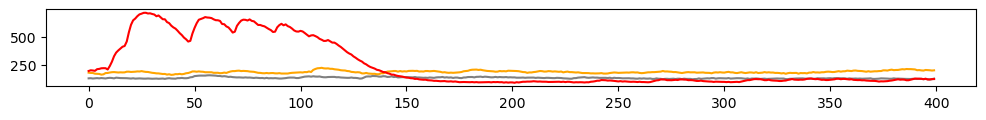

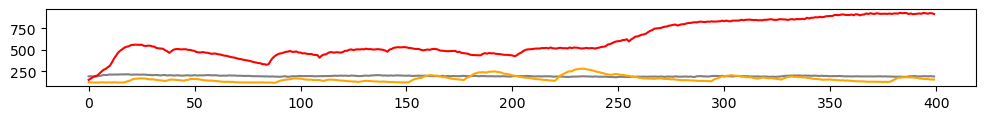

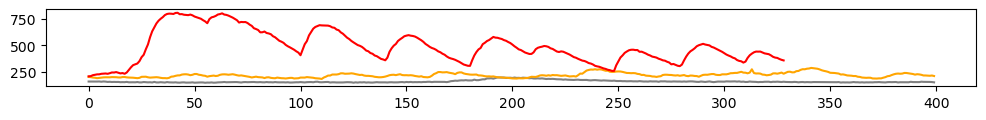

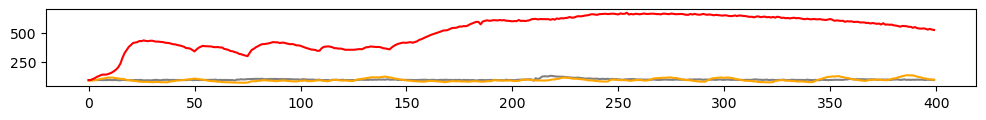

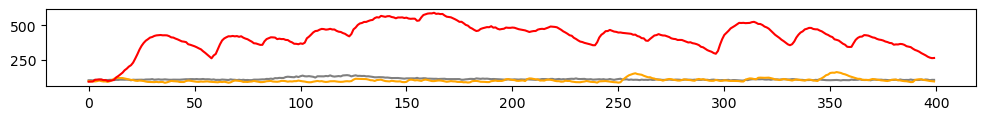

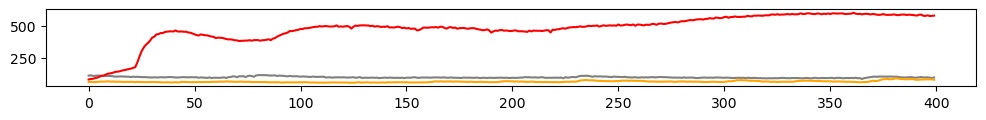

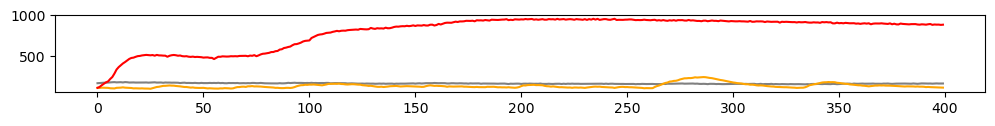

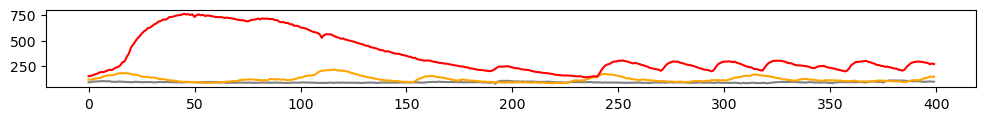

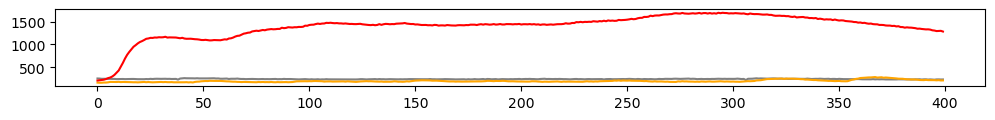

In [8]:
#Check time series
for i in range(len(bln_list)):
    fig, ax = plt.subplots(figsize= (12,1))  
    mean = np.apply_along_axis(np.mean, 0, bln_list[i])
    plt.plot(mean, c='grey')
    mean = np.apply_along_axis(np.mean, 0, pre_list[i])
    plt.plot(mean, c='orange')
    mean = np.apply_along_axis(np.mean, 0, p20_list[i])
    plt.plot(mean, c='red')
    plt.show()

In [9]:
#PCA VAR
bln_pcv, pre_pcv, p20_pcv = list(range(len(bln_list))),list(range(len(bln_list))),list(range(len(bln_list)))
for i in range(len(bln_list)):
    b_data,pre_data,p20_data = bln_list[i], pre_list[i], p20_list[i]
    b_components, pre_components, p20_components = b_data.shape[1], pre_data.shape[1], p20_data.shape[1]
    b_pca, pre_pca, p20_pca = decomposition.PCA(b_components) ,decomposition.PCA(pre_components), decomposition.PCA(p20_components) #Define decomposition
    b_fit, pre_fit, p20_fit = b_pca.fit(b_data) ,pre_pca.fit(pre_data),p20_pca.fit(p20_data) 
    bln_pcv[i], pre_pcv[i], p20_pcv[i] = b_fit.explained_variance_ratio_, pre_fit.explained_variance_ratio_, p20_fit.explained_variance_ratio_

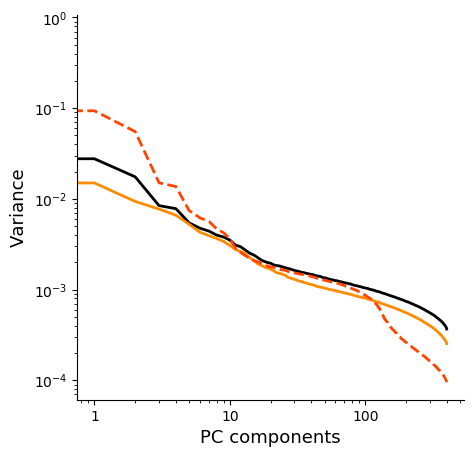

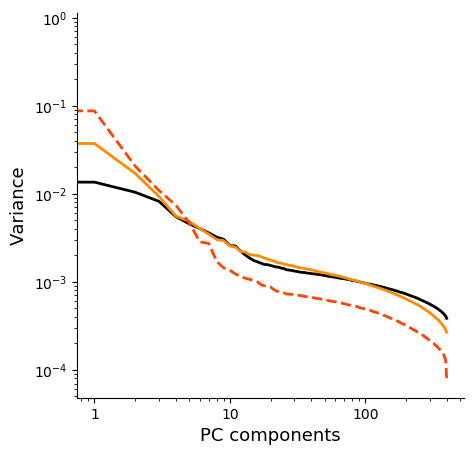

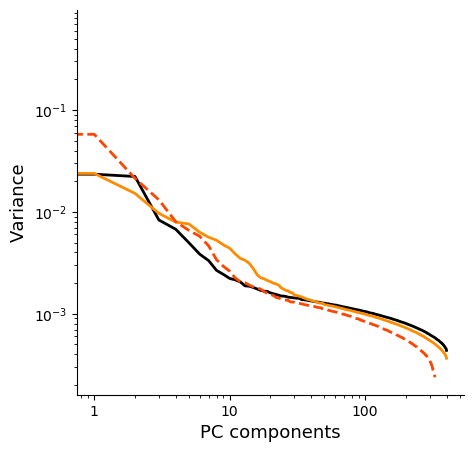

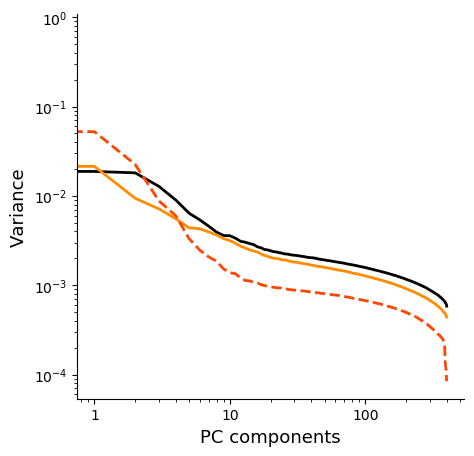

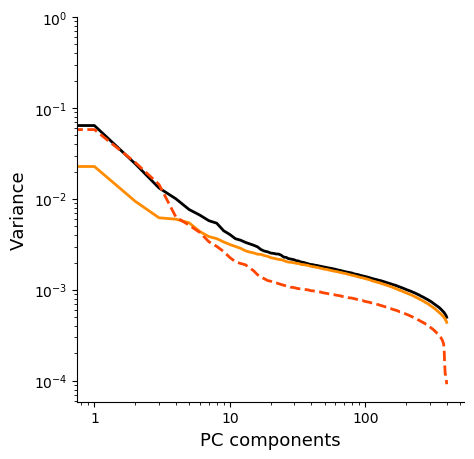

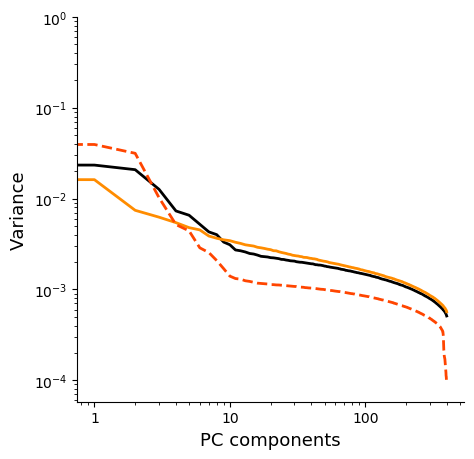

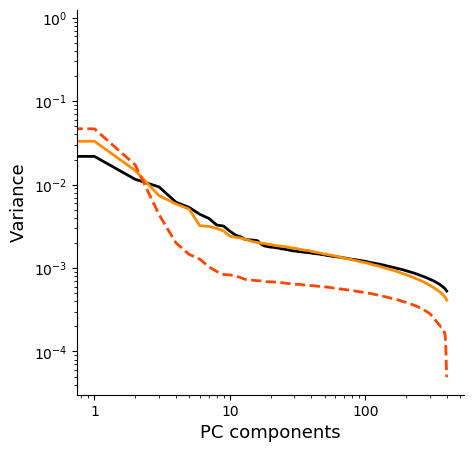

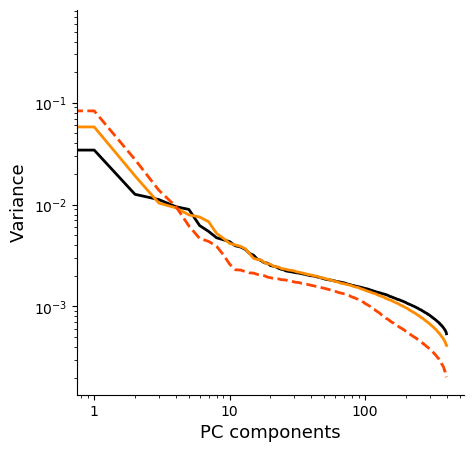

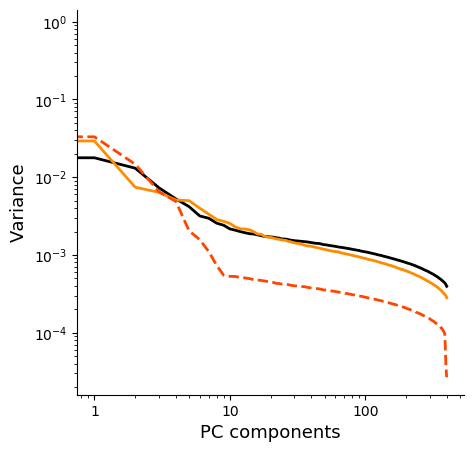

In [10]:
import matplotlib
import powerlaw
from scipy import stats
sns.reset_orig()
b_slope, pre_slope, p20_slope = list(range(len(bln_pcv))), list(range(len(bln_pcv))), list(range(len(bln_pcv)))
b_corr, pre_corr, p20_corr = list(range(len(bln_pcv))), list(range(len(bln_pcv))), list(range(len(bln_pcv)))

colors = ['black', 'darkorange','orangered']
lines = ['-', '-', '--']
count=0
for i in range(len(bln_pcv)):
    plotlist = [bln_pcv,pre_pcv,p20_pcv]
    slopelist = [b_slope,pre_slope,p20_slope]
    corrlist = [b_corr, pre_corr, p20_corr]
    fig, axarr = plt.subplots(figsize = (5,5))
    for e in range(len(plotlist)):
        data = plotlist[e][i]
        xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
        yaxis = data
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
        m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
        y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
        corrlist[e][count] = stats.pearsonr(yaxis[1:], y_fit[1:])[0]
        slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
    count+=1
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.set_ylabel('Variance', size = '13')
    axarr.set_xlabel('PC components', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

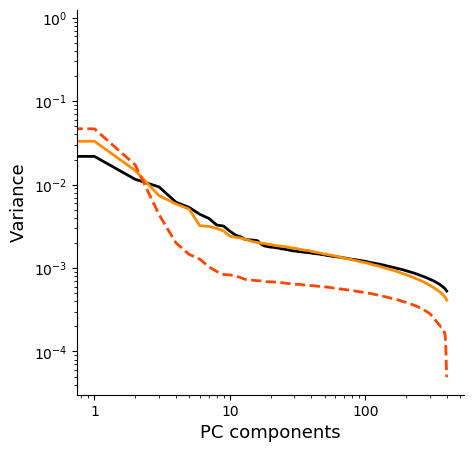

In [17]:
import matplotlib
import powerlaw
from scipy import stats
sns.reset_orig()
b_slope, pre_slope, p20_slope = list(range(len(bln_pcv))), list(range(len(bln_pcv))), list(range(len(bln_pcv)))
b_corr, pre_corr, p20_corr = list(range(len(bln_pcv))), list(range(len(bln_pcv))), list(range(len(bln_pcv)))

colors = ['black', 'darkorange','orangered']
lines = ['-', '-', '--']
count=0
i = 6
plotlist = [bln_pcv,pre_pcv,p20_pcv]
slopelist = [b_slope,pre_slope,p20_slope]
corrlist = [b_corr, pre_corr, p20_corr]
fig, axarr = plt.subplots(figsize = (5,5))
for e in range(len(plotlist)):
    data = plotlist[e][i]
    xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
    yaxis = data
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
    m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
    y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
    corrlist[e][count] = stats.pearsonr(yaxis[1:], y_fit[1:])[0]
    slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
count+=1
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC components', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('av_eig.svg', transparent = True)
plt.show()

In [116]:
#EXPONENT
import pandas as pd

exp = np.zeros((27))
fli = list(range(9))
flist=[]
for i in range(9):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

exdf = pd.DataFrame({"Exponent":np.append(slopelist[0],np.append(slopelist[1], slopelist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',9),np.append(adfn.repeat_list('Pre-ictal',9),adfn.repeat_list('Ictal',9))), "Fish":flist})

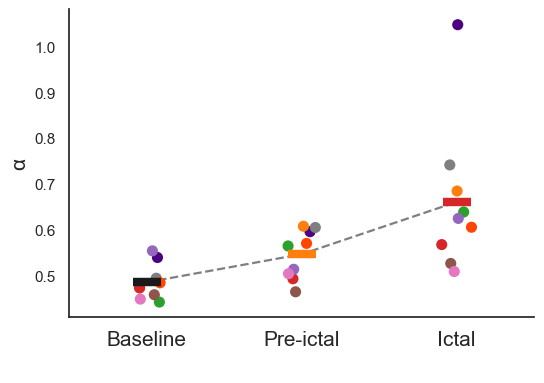

In [118]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['k','#ff7f0e','#d62728']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data = exdf, hue = 'Fish', palette = colors1, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Baseline', 'Pre-ictal', 'Ictal'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)

plt.savefig('exp_dim.svg', transparent = True)

plt.show()

In [119]:
adfn.ttest(exdf, 'Labels', 'Exponent', ['Baseline', 'Pre-ictal', 'Ictal'], mode='single')

[[-3.1455443404117536,
  0.013690195733876826,
  0.025,
  'Significant',
  'Baseline - Pre-ictal'],
 [-3.687575120164519,
  0.006151646597498954,
  0.025,
  'Significant',
  'Baseline - Ictal']]

In [11]:
#POWER LAW CORRELATION
import pandas as pd

corr = np.zeros((27))
fli = list(range(9))
flist=[]
for i in range(9):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

corrdf = pd.DataFrame({"r":np.append(corrlist[0],np.append(corrlist[1], corrlist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',9),np.append(adfn.repeat_list('Pre-ictal',9),adfn.repeat_list('Ictal',9))), "Fish":flist})

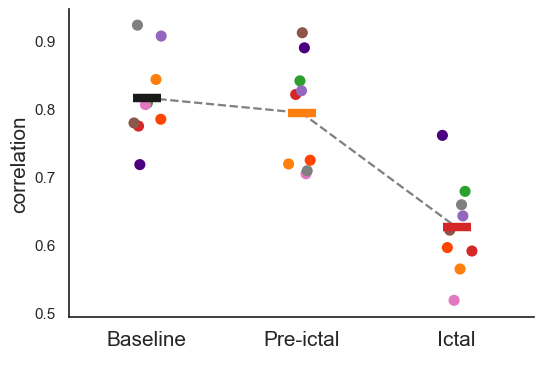

In [13]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['k','#ff7f0e','#d62728']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="r", data = corrdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="r", data = corrdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="r", data = corrdf, hue = 'Fish', palette = colors1, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('correlation', size = '15')
ax.set_xticklabels(['Baseline', 'Pre-ictal', 'Ictal'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.savefig('powerlaw_corrdis.svg', transparent = True)
plt.show()

In [19]:
adfn.ttest(corrdf, 'Labels', 'r', ['Baseline', 'Pre-ictal', 'Ictal'], mode='single')

[[0.7671818334039117,
  0.4650100361503191,
  0.025,
  'Not significant',
  'Baseline - Pre-ictal'],
 [6.2496919201488454,
  0.0002457917327662998,
  0.025,
  'Significant',
  'Baseline - Ictal']]

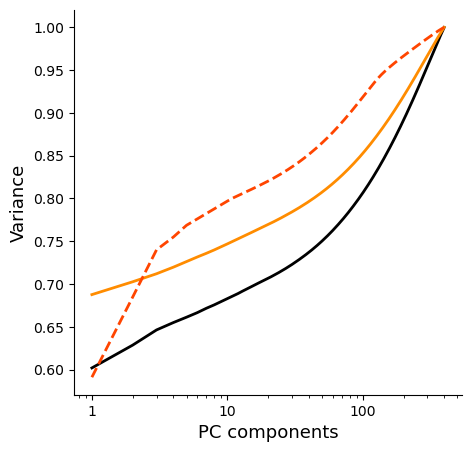

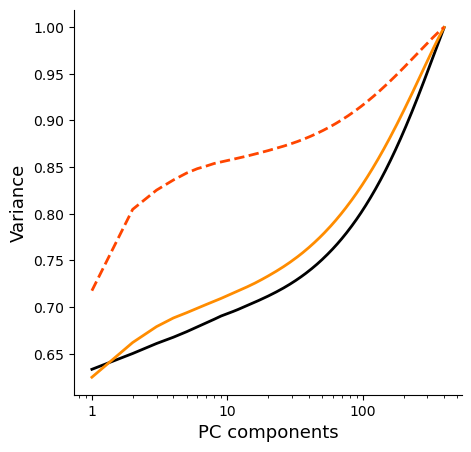

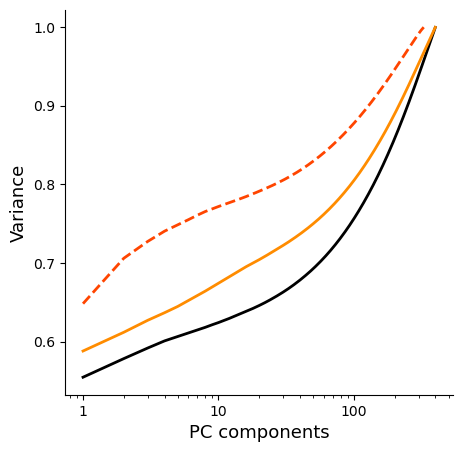

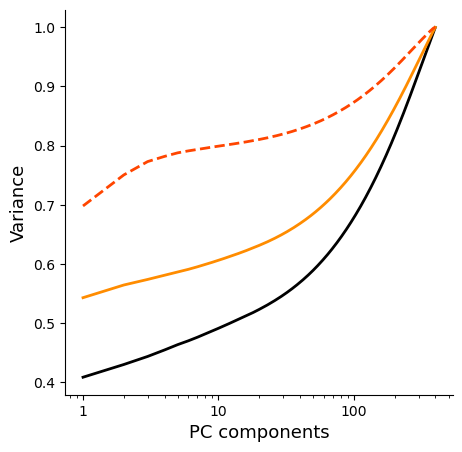

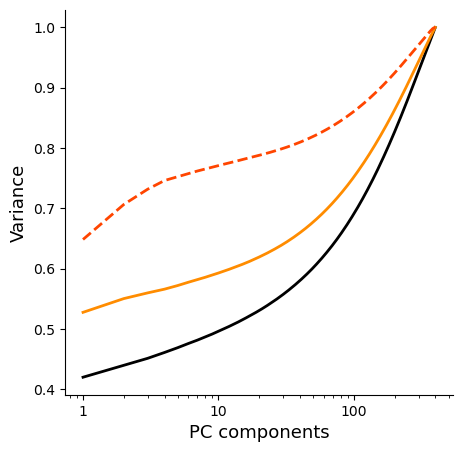

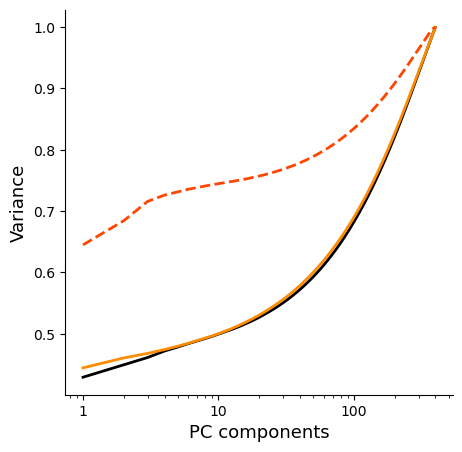

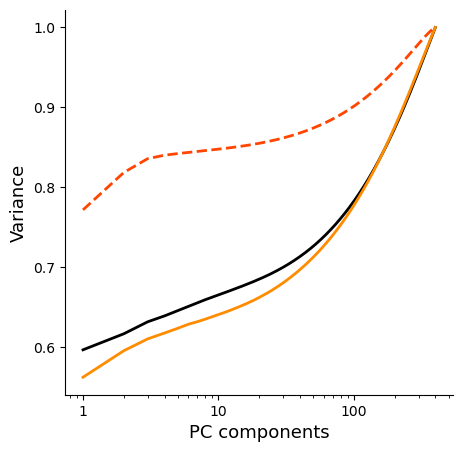

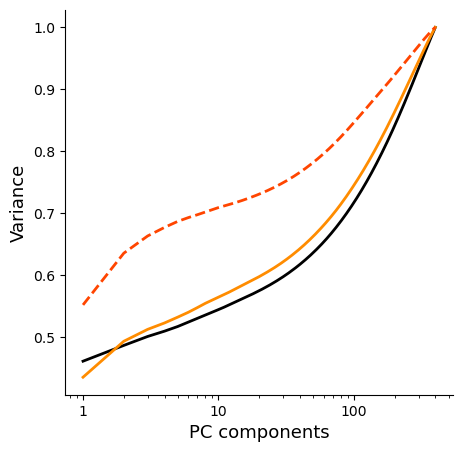

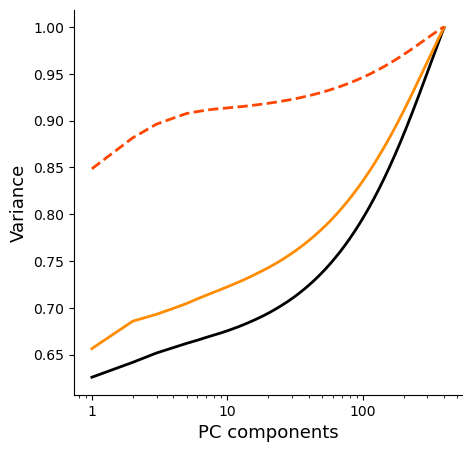

In [33]:
import matplotlib
import powerlaw
sns.reset_orig()

def cumulative(input_vec):
    count = 0
    output_vec = np.zeros(input_vec.shape)
    for i in range(len(input_vec)):
        count = count + input_vec[i]
        output_vec[i] = count
    return(output_vec)

colors = ['black', 'darkorange','orangered']
lines = ['-', '-', '--']
count=0
for i in range(len(bln_pcv)):
    plotlist = [bln_pcv,pre_pcv,p20_pcv]
    slopelist = [b_slope,pre_slope,p20_slope]
    fig, axarr = plt.subplots(figsize = (5,5))
    for e in range(len(plotlist)):
        data = plotlist[e][i]
        xaxis = np.linspace(1,np.shape(data)[0], num = np.shape(data)[0])
        yaxis = cumulative(data)
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
    count+=1
    axarr.set_xscale('log')
    #axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.set_ylabel('Variance', size = '13')
    axarr.set_xlabel('PC components', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

# State transition - manifold smoothness
* Show dynamic reorganisation of population responses throughout seizure block - different state transitions
* suggests changes to dimensionality/connectivity throughout entire period

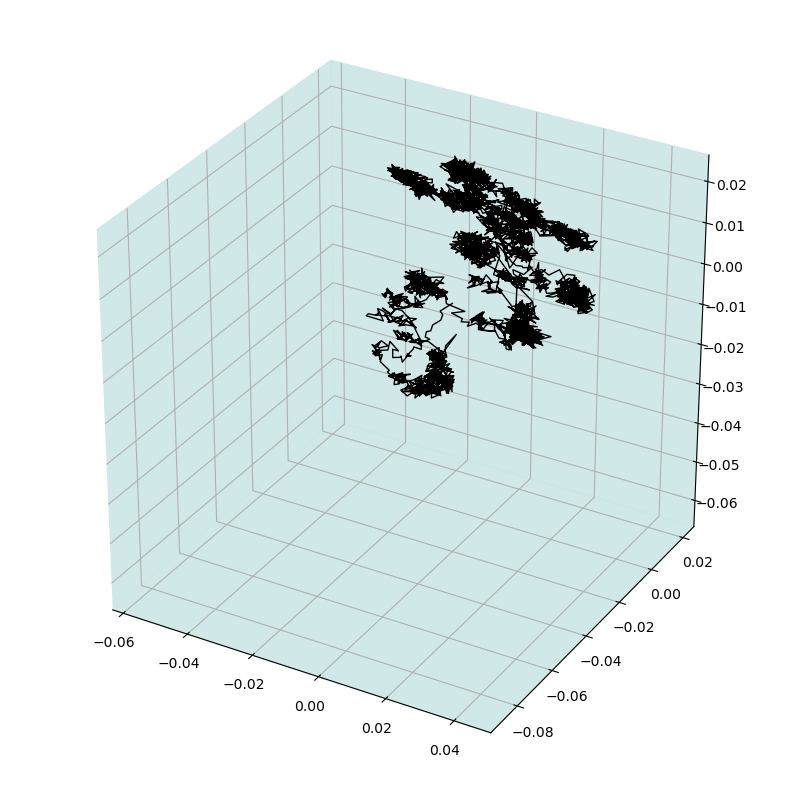

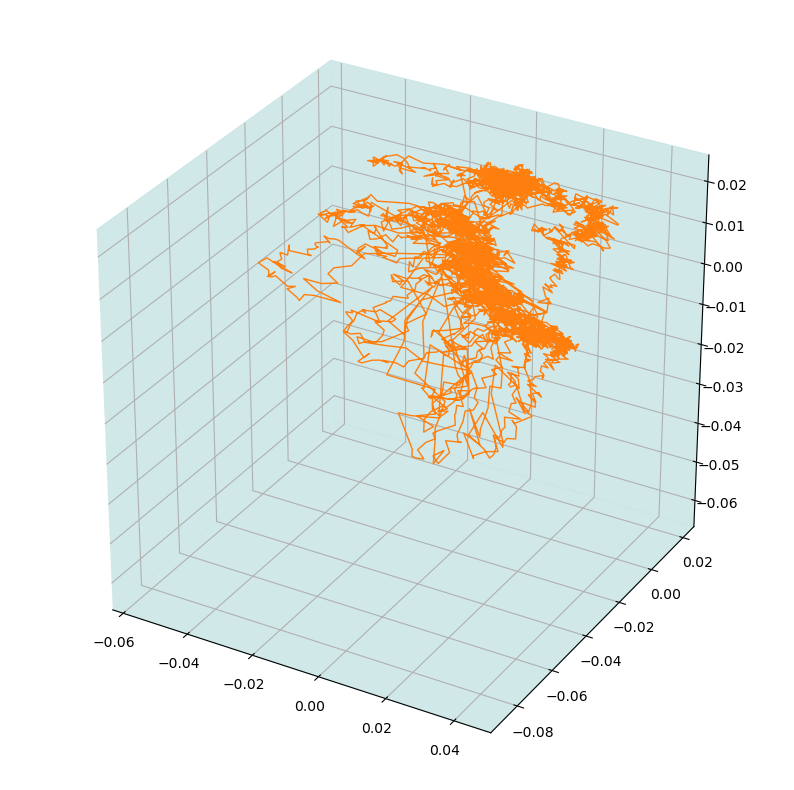

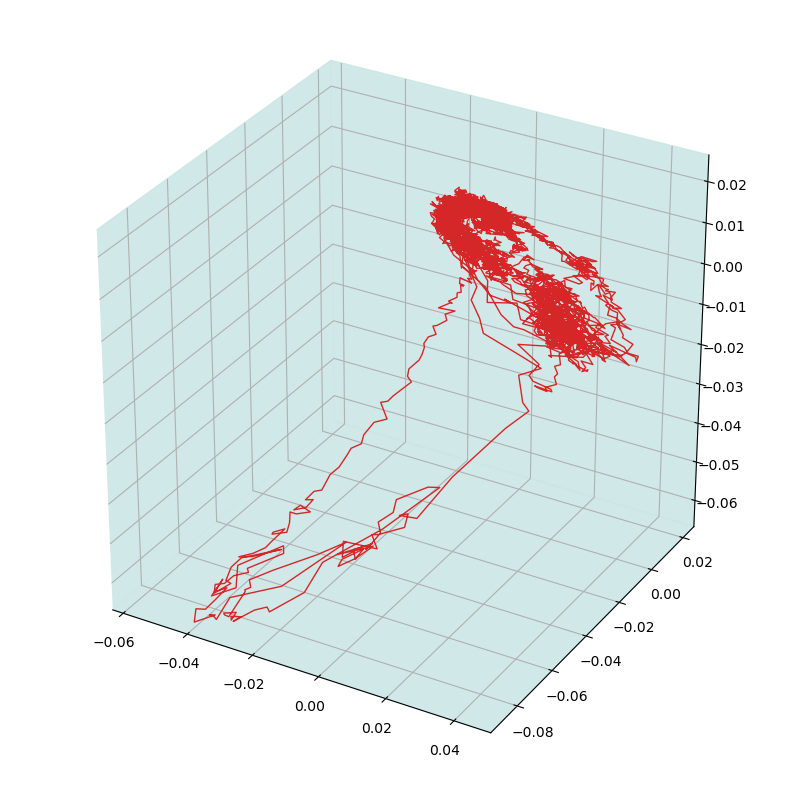

In [16]:
colors = ['k','#ff7f0e','#d62728']

i, n_components = 0, 4
bln = np.load(sub_bln_list[i])
p5 = np.load(sub_p5_list[i])
p20 = np.load(gen_list[i])
plotlist = bln, p5, p20
x,y,z, = [],[],[]

for i in range(len(plotlist)):
    pca = decomposition.PCA(n_components)
    fit = pca.fit(plotlist[i]) 
    x = np.append(fit.components_[3,:], x)
    y = np.append(fit.components_[2,:], y)
    z = np.append(fit.components_[1,:], z)
xmax, xmin = np.max(x), np.min(x)
ymax, ymin = np.max(y), np.min(y)
zmax, zmin = np.max(z), np.min(z)

namelist = ['bln', 'interictal', 'ictal']
for i in range(len(plotlist)):
    pca = decomposition.PCA(n_components)
    fit = pca.fit(plotlist[i])
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize= (10,10))
    ax = fig.add_subplot(projection='3d')
    ax.plot3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], colors[i], linewidth = 1)
    ax.w_xaxis.set_pane_color((0. 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.6, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.6, 0.9, 0.9, 0.9))
    ax.set_zlim(zmin, zmax)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    #plt.savefig('eig_exp-'  + str(namelist[i]) + ' .svg', transparent = True)
    #plt.zlim(zmin, zmax)
    plt.show()

In [19]:
## Functions 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

def rand_project(n_samples, n_features, n_components, alpha, theta):
    W = np.random.randn(n_components, n_features) #weight matrix - entirely random - 3 PCs
    X = np.zeros((n_features, n_samples)) #x matrix - features x samples

    for n in range(1, (n_features//2)):
        X[(2*n)-1,:] = np.cos(theta*n)/n**(alpha/2) 
        X[(2*n), :] = np.sin(theta*n)/n**(alpha/2) 

    #for n in range(1, (n_features)):
    #  X[n] = np.sin(n*theta)/n**(alpha/2)


    wproj = W @ X
    return(wproj, W, X)

def eigenspec(scores):
    var_vec = np.zeros(len(scores))
    for i in range(len(scores)):
        var_vec[i] = np.var(scores[i])
        eigvar = np.zeros(len(scores))  
    for i in range(len(scores)):
        eigvar[i] = var_vec[i]/np.sum(var_vec)

    return(eigvar)


In [20]:
#Calculate projections for different exponents
n_samples = 2**12 
theta = np.linspace(0,2*np.pi,n_samples) #range theta over 360d (2pi), with n_samples
n_features = 1000
n_components = 4
alp = [1.5, 2.5, 3.5] 

proj_list = list(range(len(alp)))
W_list = list(range(len(alp)))
X_list = list(range(len(alp)))

for i in range(len(alp)):
    proj_list[i], W_list[i], X_list[i] = rand_project(n_samples, n_features, n_components, alp[i], theta)

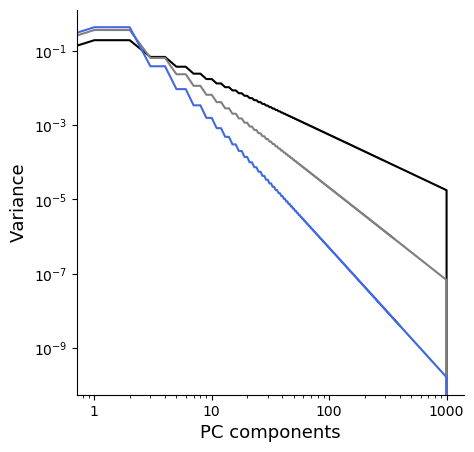

In [21]:
#Plot eigenspectrum
col = ['k', 'grey', 'royalblue']

fig, axarr = plt.subplots(figsize = (5,5))

for i in range(len(alp)):
    data = eigenspec(X_list[i])
    xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
    yaxis = data
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, color = col[i])
    slope = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][10:-2]),np.log10(yaxis[:len(xaxis)-1][10:-2]))[0]
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    #axarr.set_title(slope)
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.set_ylabel('Variance', size = '13')
    axarr.set_xlabel('PC components', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.savefig('eig_exp.svg', transparent = True)

plt.show()  

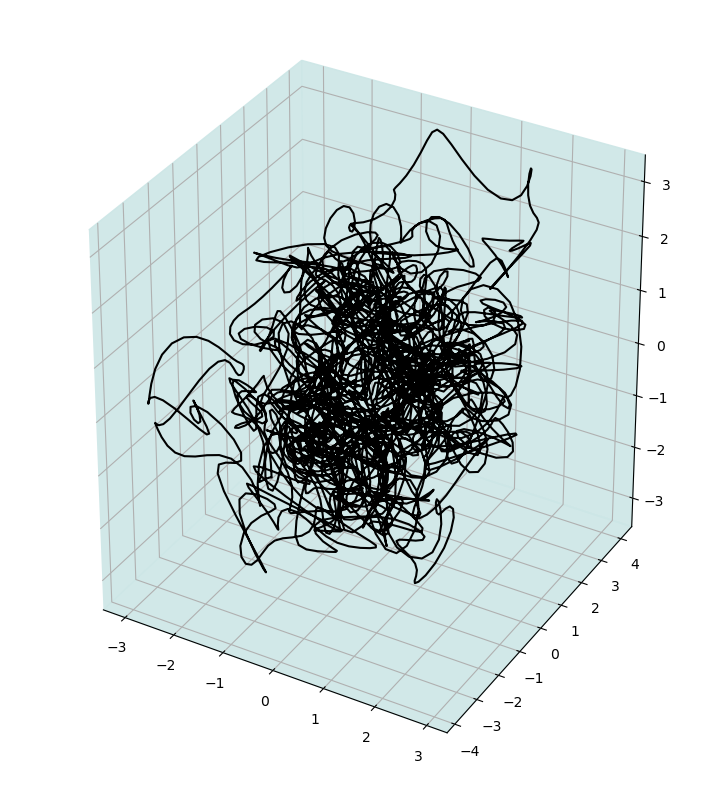

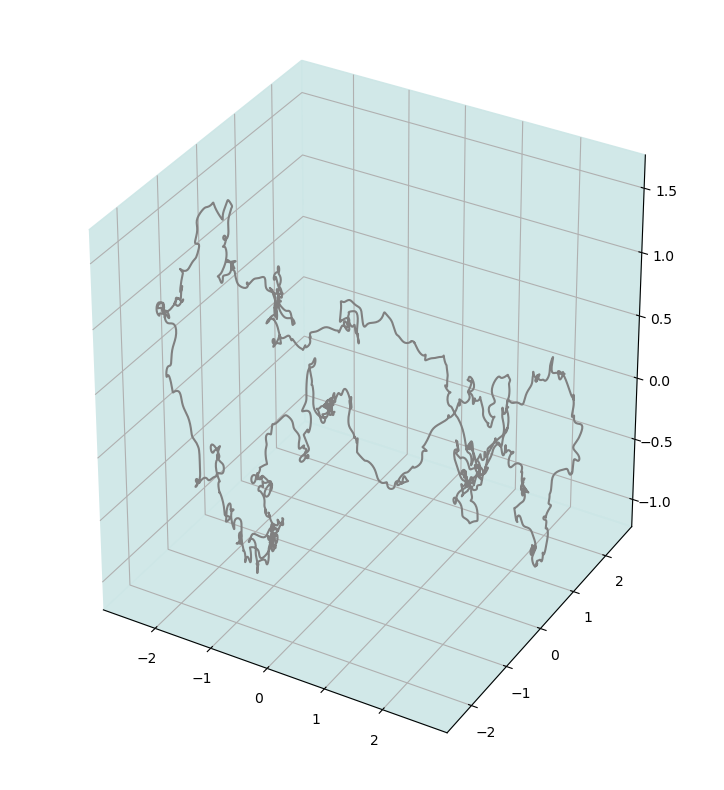

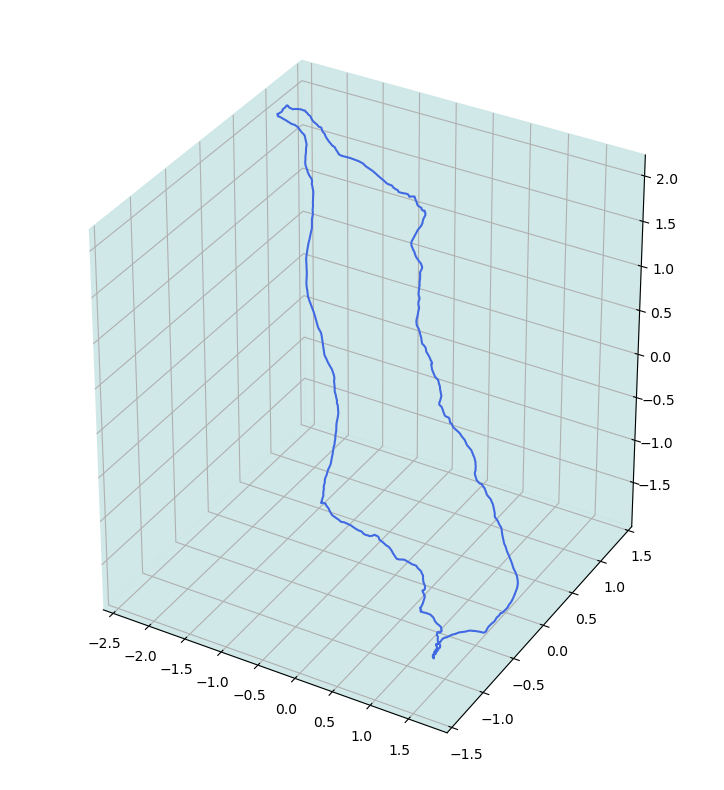

In [26]:
col = ['k', 'grey', 'royalblue']
#plot random projection


for i in range(len(alp)):

    fig = plt.figure(figsize= (20,10))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    dotplot = ax.plot(proj_list[i][1,:], proj_list[i][2,:],proj_list[i][3,:], alpha = 1, linewidth = 1.5, color = col[i])
    ax.w_xaxis.set_pane_color((0.8, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.8, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.8, 0.9, 0.9, 0.9))
    #ax.set_title(alp[i])
    #ax.set_xlim(-2.5,2.2)
    #ax.set_ylim(-2.5,2.2)
    #ax.set_zlim(-2.5,2.2)
    plt.savefig('eig_randproj-' + str(i) + '.svg', transparent = True)
    plt.show()


In [ ]:
# Sliding window 

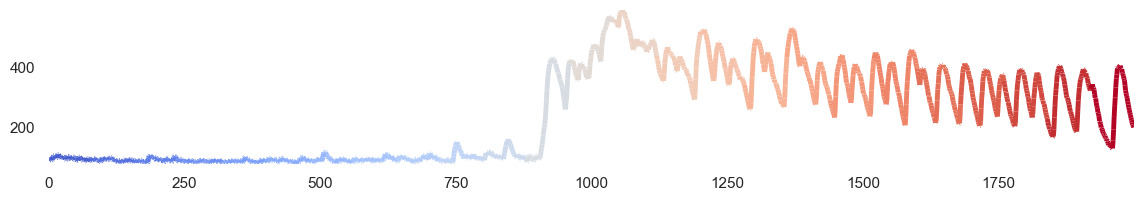

In [109]:
#CHOOSE FISH
choose = 4
data = np.load(gen_list[choose])[:,2000:4000]
mean = np.apply_along_axis(np.mean, 0, data)
window = adfn.window(52, mean.shape[0])[0]
data_list = list(range((np.int(mean.shape[0]/window))))
    
#PLOT MEAN DIST BY SEGMENTS
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

y = mean
x = np.linspace(0,mean.shape[0]-1, mean.shape[0])
z = np.zeros(mean.shape[0])
count=0
for i in range(len(data_list)):
    z[count:count+window] = i+1
    count+=window

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be numlines x points per line x 2 (x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the line collection object, setting the colormapping parameters.
# Have to set the actual values used for colormapping separately.
fig, ax = plt.subplots(figsize= (14,2))
lc = LineCollection(segments, linewidths = 100, cmap=plt.get_cmap('coolwarm'), norm=plt.Normalize(0, len(data_list)))
lc.set_array(z)
lc.set_linewidth(3.5)
lc.set_alpha(1)
plt.gca().add_collection(lc)

plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())


#for x in max_list[choose]: plt.axvline(x=x, c='orangered', linewidth = 1, linestyle= '--')
#for x in max_list[choose]: plt.axvline(x=x+window, c='grey', linewidth = 1.5, linestyle= '--')
#for x in max_list[choose]: plt.axvline(x=x-window, c='orange', linewidth = 1.5, linestyle= '--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('avbrain_seizure.svg', transparent = True)
plt.show()

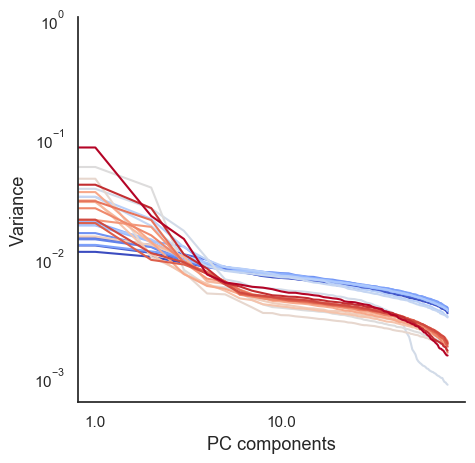

In [114]:
#CHOOSE FISH
#choose = 3
#data = np.load(gen_list[choose])
#mean = np.apply_along_axis(np.mean, 0, data)
#window = adfn.window(100, mean.shape[0])[0]

#CALCULATE EIGENSPECTRUM FOR SEGMENTS
count,count1=0,0
data_list = list(range((np.int(mean.shape[0]/window))))
for e in range(np.int(mean.shape[0]/window)):
    sub_data = data[:,count:count+window]
    n_components = sub_data.shape[1]
    pca = decomposition.PCA(n_components)
    fit = pca.fit(sub_data)
    data_list[count1] = fit.explained_variance_ratio_

    count+=window
    count1+=1

import matplotlib
import sys
from scipy import stats
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,len(data_list))))
fig, axarr = plt.subplots(figsize = (5,5))
for i in range(len(data_list)):
    xaxis = np.linspace(0,np.shape(data_list[i])[0], num = np.shape(data_list[i])[0]+1)
    yaxis = data_list[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 2, alpha = 1)
    axarr.set_xscale('log')
    axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC components', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('dim_dynamic.svg', transparent = True)

plt.show()

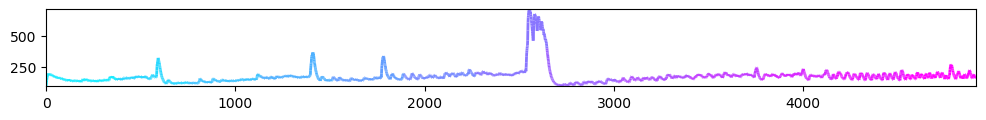

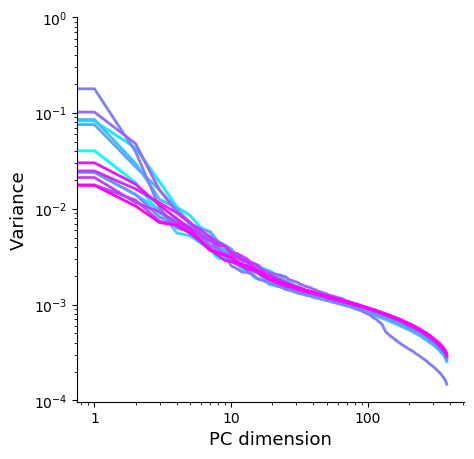

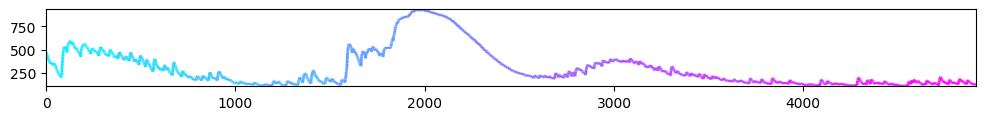

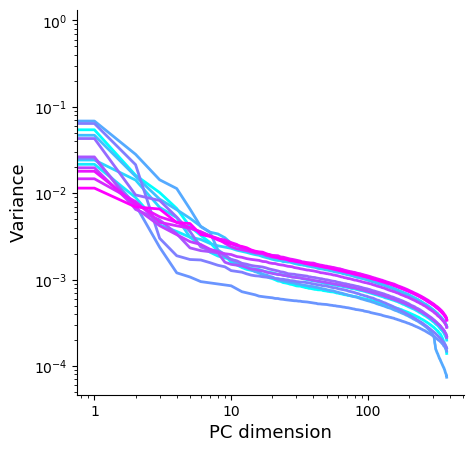

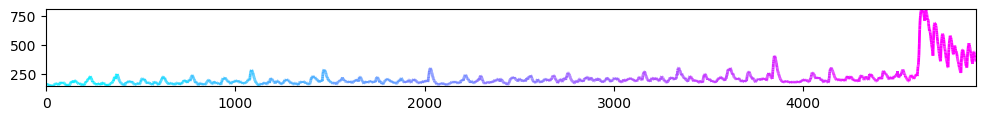

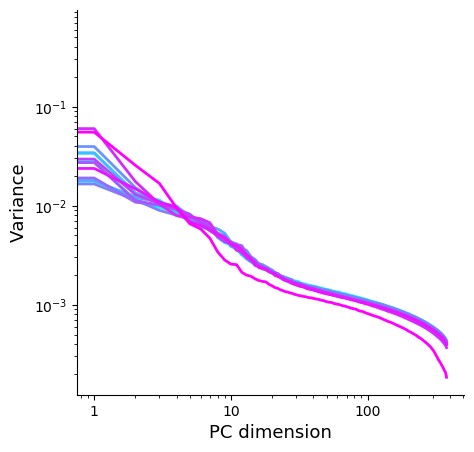

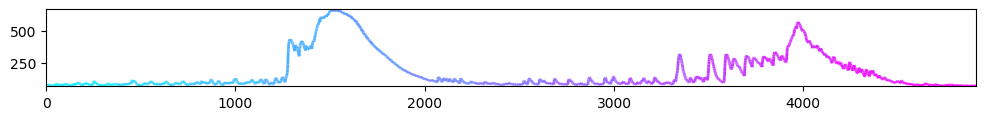

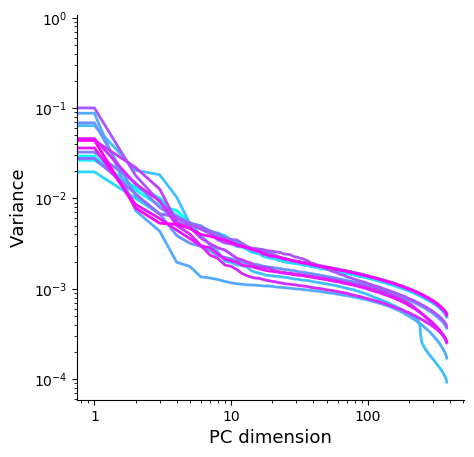

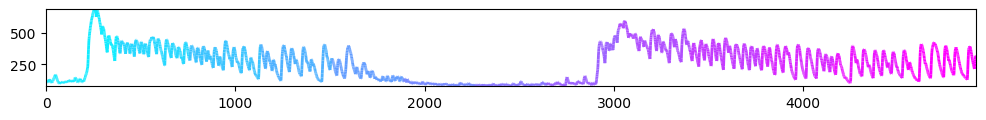

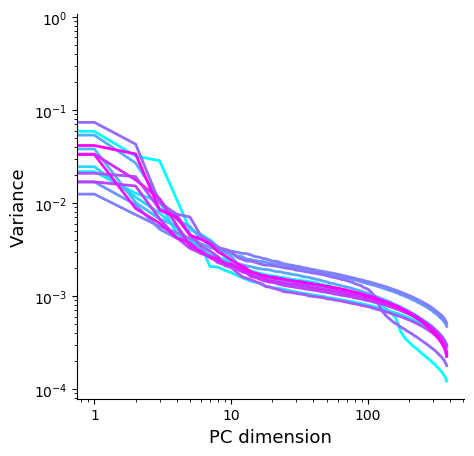

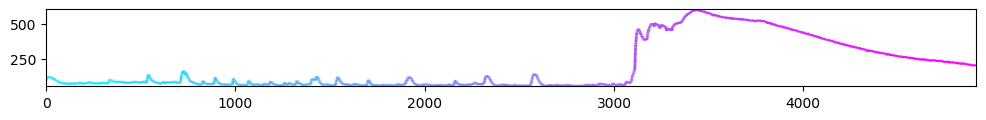

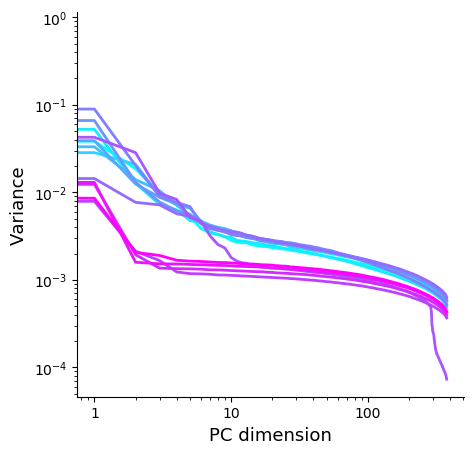

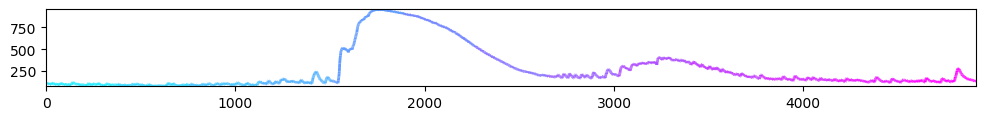

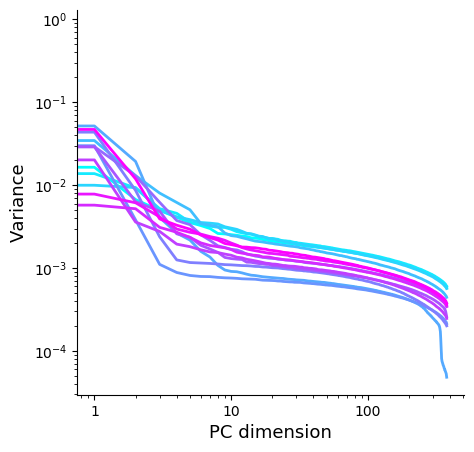

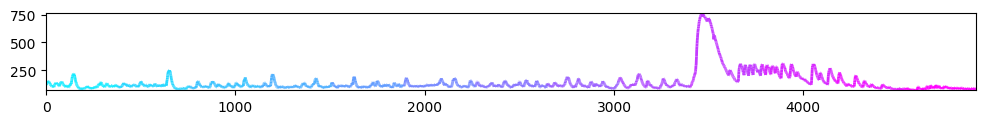

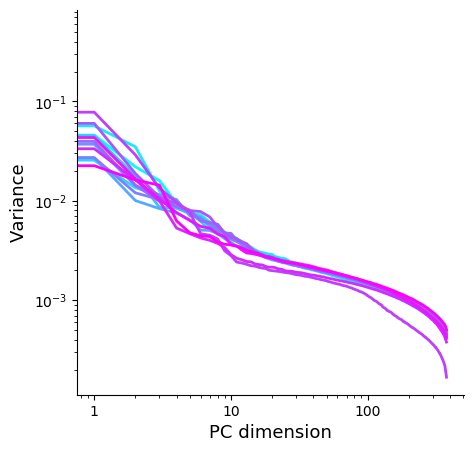

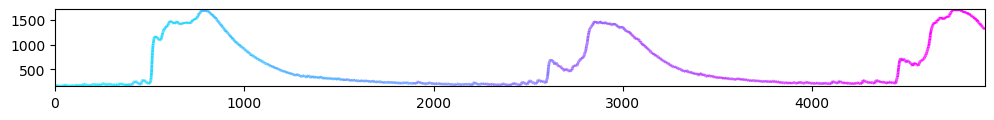

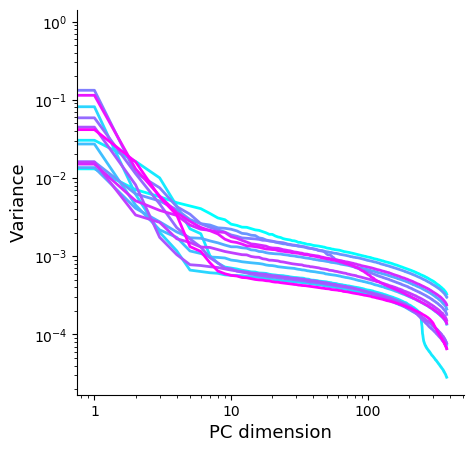

In [37]:
for o in range(len(gen_list)):
    choose = o
    data = np.load(gen_list[choose])
    mean = np.apply_along_axis(np.mean, 0, data)
    window = adfn.window(370, mean.shape[0])[0]
    count,count1=0,0
    data_list = list(range((np.int(mean.shape[0]/window))))

    #PLOT MEAN DIST BY SEGMENTS
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.collections import LineCollection
    from matplotlib.colors import ListedColormap, BoundaryNorm

    y = mean
    x = np.linspace(0,mean.shape[0]-1, mean.shape[0])
    z = np.zeros(mean.shape[0])
    count=0
    for i in range(len(data_list)):
        z[count:count+window] = i+1
        count+=window


    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be numlines x points per line x 2 (x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create the line collection object, setting the colormapping parameters.
    # Have to set the actual values used for colormapping separately.
    fig, ax = plt.subplots(figsize= (12,1))
    lc = LineCollection(segments, cmap=plt.get_cmap('cool'), norm=plt.Normalize(0, len(data_list)))
    lc.set_array(z)
    lc.set_linewidth(2)
    plt.gca().add_collection(lc)

    plt.xlim(x.min(), x.max())
    plt.ylim(y.min(), y.max())
    plt.show()

    #EIGENSPECTRUM
    import matplotlib
    import sys
    from scipy import stats
    count,count1=0,0
    data_list = list(range((np.int(mean.shape[0]/window))))
    for e in range(np.int(mean.shape[0]/window)):
        sub_data = data[:,count:count+window]
        n_components = sub_data.shape[1]
        pca = decomposition.PCA(n_components)
        fit = pca.fit(sub_data)
        data_list[count1] = fit.explained_variance_ratio_

        count+=window
        count1+=1
    
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.cool(np.linspace(0,1,len(data_list))))
    fig, axarr = plt.subplots(figsize = (5,5))
    for i in range(len(data_list)):
        xaxis = np.linspace(0,np.shape(data_list[i])[0], num = np.shape(data_list[i])[0]+1)
        yaxis = data_list[i]
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 0.5, alpha = 1)
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.set_ylabel('Variance', size = '13')
    axarr.set_xlabel('PC dimension', size = '13')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()
